In [1]:
import pandas as pd
import os
import glob

Merge data from each month into one CSV

In [6]:
files = [file for file in os.listdir('./Sales_Data')]
all_month_data = pd.DataFrame()
for file in files:
    current_data = pd.read_csv('./Sales_Data/'+file) 
    all_month_data = pd.concat([all_month_data,current_data]) 
    
all_month_data.to_csv("all_data.csv",index=False)

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


Clean up the data!
The first step in this is figuring out what we need to clean. I have found in practice, that you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

Drop rows of NAN

In [ ]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
display(nan_df.head())

all_data = all_data.dropna(how='all')
all_data.head()

Get rid of text in order date column

In [9]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

Make columns correct type

In [10]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

### Augment data with additional columns
Add month column

In [11]:
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1


### Task4:Add a city column

In [29]:
def get_city(address):
    return address.split(',')[1]

def get_state(address):
    return address.split(',')[2].split(' ')[1]


all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)} ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,Column,City
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,1,700,Boston,Boston (MA)
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,1,14,Portland,Portland (OR)
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,1,22,San Francisco,San Francisco (CA)
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,1,149,Los Angeles,Los Angeles (CA)
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,1,11,Austin,Austin (TX)


Add month column (alternative method)

In [12]:
all_data['Month 2'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2
0,141234,iPhone,1,700.00,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",1,1
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",1,1
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",1,1
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",1,1
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",1,1


Data Exploration!
Question 1: What was the best month for sales? How much was earned that month?

In [16]:
all_data['Sales'] = all_data['Quantity Ordered'].astype("int") * all_data['Price Each'].astype("int")


In [21]:
all_data.groupby(['Month']).sum()

/tmp/ipykernel_494415/2666040485.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  all_data.groupby(['Month']).sum()


,Quantity Ordered,Price Each,Month 2,Sales
Month,,,,
1,10903,1811768.38,9709,1813956
2,13449,2188884.72,23950,2191696
3,17005,2791207.83,45459,2794068
4,19,5167.43,72,5155
5,18638,3124569.68,82690,3127745
6,15253,2562025.61,81324,2566187
7,16072,2632539.56,100051,2635443
8,13448,2230345.42,95688,2234194
9,13109,2084992.09,104589,2087435


range(1, 13)


/tmp/ipykernel_494415/1653630286.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])


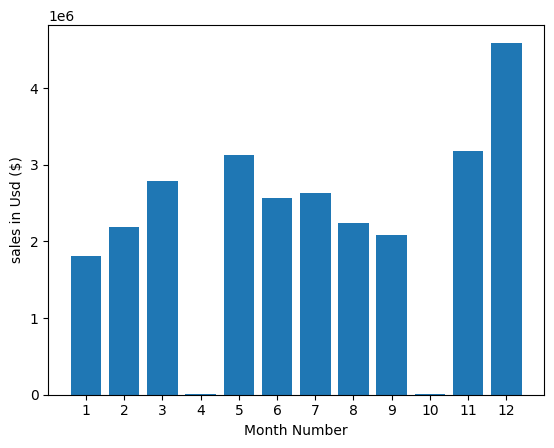

In [19]:
import matplotlib.pyplot as plt

months = range(1,13)
print(months)

plt.bar(months,all_data.groupby(['Month']).sum()['Sales'])
plt.xticks(months)
plt.ylabel('sales in Usd ($)')
plt.xlabel('Month Number')
plt.show()




### what city highest number of sales?

In [31]:
result = all_data.groupby(['City']).sum()
result

/tmp/ipykernel_494415/3455920883.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result = all_data.groupby(['City']).sum()


,Quantity Ordered,Price Each,Month,Month 2,Sales
City,,,,,
Atlanta (GA),13173,2192169.88,82852,82852,2194336
Austin (TX),8828,1436409.61,55036,55036,1437097
Boston (MA),17893,2921109.98,111672,111672,2926727
Dallas (TX),13398,2178988.54,82827,82827,2181064
Los Angeles (CA),26167,4264223.74,163276,163276,4268593
New York City (NY),22238,3708198.13,139520,139520,3714277
Portland (ME),2204,353017.71,13662,13662,353222
Portland (OR),8893,1462540.25,55290,55290,1463467
San Francisco (CA),39948,6540056.83,250087,250087,6548685


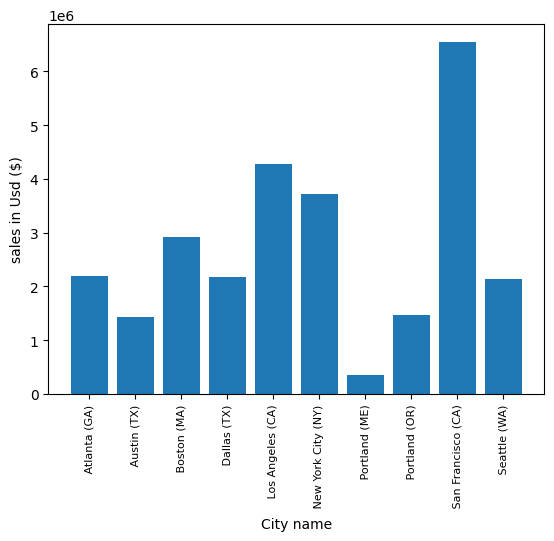

In [35]:
# cities = all_data['City'].unique()

cities = [city for city,df in all_data.groupby('City')]

plt.bar(cities,result['Sales'])
plt.xticks(cities,rotation='vertical',size=8)
plt.ylabel("sales in Usd ($)")
plt.xlabel("City name")
plt.show()

### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?

In [44]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute

# all_data.drop(['hour', 'minute'], axis = 1, inplace = True) 
# all_data.head()

all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Month 2,Sales,Column,City,Hour,Minute
0,141234,iPhone,1,700.00,2019-01-22 21:25:00,"944 Walnut St, Boston, MA 02215",1,1,700,Boston,Boston (MA),21,25
1,141235,Lightning Charging Cable,1,14.95,2019-01-28 14:15:00,"185 Maple St, Portland, OR 97035",1,1,14,Portland,Portland (OR),14,15
2,141236,Wired Headphones,2,11.99,2019-01-17 13:33:00,"538 Adams St, San Francisco, CA 94016",1,1,22,San Francisco,San Francisco (CA),13,33
3,141237,27in FHD Monitor,1,149.99,2019-01-05 20:33:00,"738 10th St, Los Angeles, CA 90001",1,1,149,Los Angeles,Los Angeles (CA),20,33
4,141238,Wired Headphones,1,11.99,2019-01-25 11:59:00,"387 10th St, Austin, TX 73301",1,1,11,Austin,Austin (TX),11,59


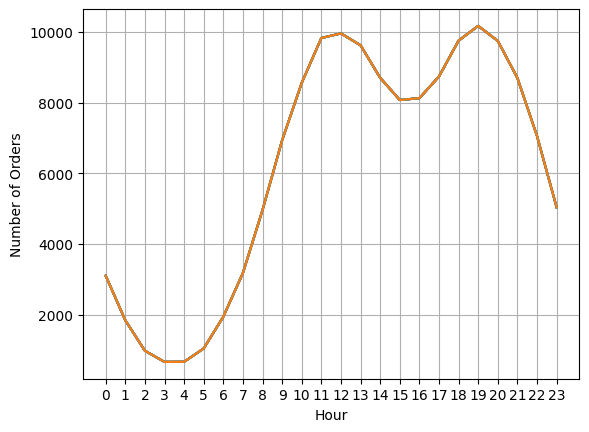

In [51]:

hours = [hour for hour ,df in all_data.groupby('Hour')]

plt.plot(hours,all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hour')
plt.ylabel('Number of Orders')
plt.grid()
plt.show()



### Question 4: What products are most often sold together?

In [60]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby

df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

df = df[['Order ID','Grouped']].drop_duplicates()

df.head()


/tmp/ipykernel_494415/55180964.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
41,141275,"USB-C Charging Cable,Wired Headphones"
57,141290,"Apple Airpods Headphones,AA Batteries (4-pack)"
133,141365,"Vareebadd Phone,Wired Headphones"
153,141384,"Google Phone,USB-C Charging Cable"
220,141450,"Google Phone,Bose SoundSport Headphones"


In [63]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-in
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list,2)))
# print(count)

count.most_common(10)


[(('iPhone', 'Lightning Charging Cable'), 807),
 (('Google Phone', 'USB-C Charging Cable'), 776),
 (('iPhone', 'Wired Headphones'), 347),
 (('Google Phone', 'Wired Headphones'), 319),
 (('Vareebadd Phone', 'USB-C Charging Cable'), 284),
 (('iPhone', 'Apple Airpods Headphones'), 282),
 (('Google Phone', 'Bose SoundSport Headphones'), 163),
 (('USB-C Charging Cable', 'Wired Headphones'), 129),
 (('Vareebadd Phone', 'Wired Headphones'), 112),
 (('Lightning Charging Cable', 'Wired Headphones'), 75)]

### Question 5: What product sold the most? Why do you think it sold the most?

/tmp/ipykernel_494415/1572318003.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  quality_ordered = product_group.sum()['Quantity Ordered']


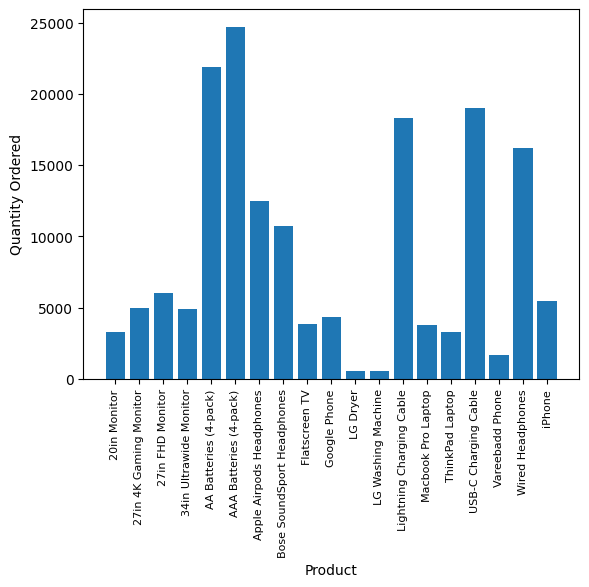

In [77]:
product_group = all_data.groupby('Product')
quality_ordered = product_group.sum()['Quantity Ordered']

products = [product for product,df in product_group]
plt.ylabel('Quantity Ordered')
plt.xlabel('Product')
plt.bar(products,quality_ordered)
plt.xticks(products,rotation = 'vertical',size=8)
plt.show()



/tmp/ipykernel_494415/2351405088.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  prices = all_data.groupby('Product').mean()['Price Each']
/tmp/ipykernel_494415/2351405088.py:12: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(products, rotation='vertical', size=8)
/tmp/ipykernel_494415/2351405088.py:14: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


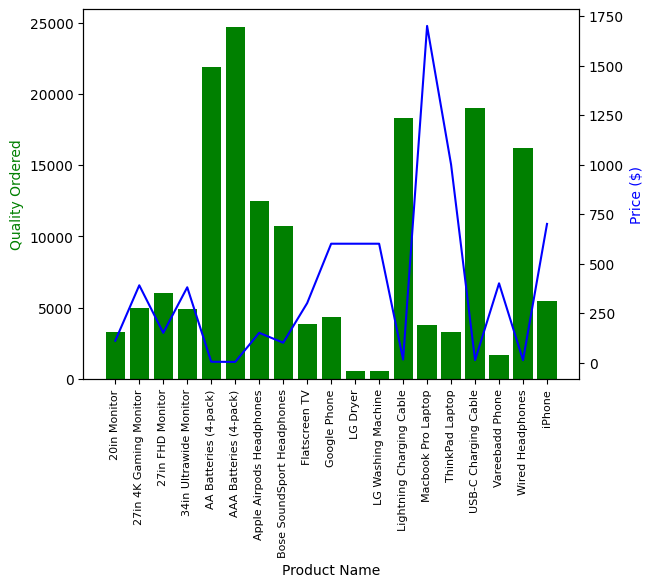

In [84]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondar

prices = all_data.groupby('Product').mean()['Price Each']

fig,ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quality_ordered,color='g')
ax2.plot(products,prices,color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quality Ordered',color='g')
ax2.set_ylabel('Price ($)',color='b')
ax1.set_xticklabels(products, rotation='vertical', size=8)

fig.show()

